In [1]:
from utils import plot_report

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family = 'Times New Roman')

import os

In [2]:
# 画图：阈值的大小影响句子长度
class thre_analysis():
    # folder:文件夹目录
    # n_cluster:聚类簇的数量
    def __init__(self, folder, n_cluster, thres = None):
        self.thres = thres
        self.folder = folder
        self.n_cluster = n_cluster
        self.raw_text = []         # N * raw_text (长度为每个category的记录数量)
        self.asp_confidence = []   # N * asp_confidence
        self.raw_text_count = []   # N * raw_text_count
        
        self.avg_len = {}          # {category_id: avg_len} (avg_len: #thres * 1)
        
        self._read_data()        
        
        self._compute_avg()
        
        self._print_info()
        
    # 读取每个 cluster 的文件
    # 文件目录：{self.folder}/{idx}.xlsx
    def _read_data(self):
        for idx in range(self.n_cluster):
            file = os.path.join(self.folder, f'{idx}.xlsx')
            df = pd.read_excel(file)
            raw_text = [text for text in df['原文本']]
            raw_text_count  = [len(text) for text in df['原文本']]
            asp_confidence = [confidence for confidence in df['pre_asp_confidence']]
        
            self.raw_text.append(raw_text)
            self.raw_text_count.append(raw_text_count)
            self.asp_confidence.append(asp_confidence)
            
    def _print_info(self):
        print(f'共有{self.n_cluster}个cluster')
        print(f'来自于文件夹{self.folder}')
        
    # 计算句子平均长度
    # 输入：需求的类别数量，x轴的阈值（列表）
    # 存入每个类别句子的平均长度（self.avg_len）
    def _count_avg_len(self, category_id, thres):
        thres = thres or [i/10 for i in range(10)]
        assert max(thres) < 1.1 and min(thres) > -0.1
        
        
        
        if category_id == 'total':
            print('---------------------------------------')
            print(f'正在处理全部的category')
            
            raw_text_count, asp_confidence = [], []
            for category_id in range(self.n_cluster):
                raw_text_count += self.raw_text_count[category_id]
                asp_confidence += self.asp_confidence[category_id]
            avg = []                                           # len(thre) * 1
            for thre in thres:
                avg_temp = []
                for confi, count in zip(asp_confidence, raw_text_count):
                    if confi > thre:
                        avg_temp.append(count)
                avg_temp = np.nanmean(np.array(avg_temp))
                avg_temp = np.round(avg_temp, 2)
                #if np.isnan(y_temp):
                    #y_temp = 0
                avg.append(avg_temp)
            print(f'根据thres={thres}:')
            print(f'全部的category的句子平均长度为{avg}')
            self.avg_len['total'] = avg
            
        else:
            print('---------------------------------------')
            print(f'正在处理第{category_id}个category')        
            raw_text_count = self.raw_text_count[category_id]
            asp_confidence = self.asp_confidence[category_id]
        
            avg = []                                           # len(thre) * 1
            for thre in thres:
                avg_temp = []
                for confi, count in zip(asp_confidence, raw_text_count):
                    if confi > thre:
                        avg_temp.append(count)
                avg_temp = np.nanmean(np.array(avg_temp))
                avg_temp = np.round(avg_temp, 2)
                #if np.isnan(y_temp):
                    #y_temp = 0
                avg.append(avg_temp)
            print(f'根据thres={thres}:')
            print(f'\t第{category_id}个category的句子平均长度为{avg}')
        
            self.avg_len[category_id] = avg
            
    # 统计全部的 category
    def _compute_avg(self):
        thres = self.thres
        for category_id in range(self.n_cluster):
            self._count_avg_len(category_id, thres)
        self._count_avg_len('total', thres)
            

    # 画图
    # category_ids:类别及其id 'total' 代表所有的平均值
    # save_folder:存储文件夹名
    # bar_width:条形图宽度
    # dpi:分辨率
    def draw(
        self,
        category_ids,
        save_folder,
        save = False,
        bar_width = 0.2,
        dpi = 1000,
        title_fontsize = 15,
        labelsize = 15,
        figsize = (8, 6)
    ):
        thres = self.thres
        thres = thres or [i/10 for i in range(10)]
        for category_id in category_ids:
            x = thres
            y = self.avg_len[category_id]
            plt.plot(x, y, color = 'r')
            plt.bar(x, y, width = bar_width)
            plt.tick_params(labelsize = labelsize)
            plt.legend()
            if category_id == 'total':
                plt.title(f'Sentence Average Length of Total Category', fontsize = title_fontsize)
            else:
                plt.title(f'sentence average length of {category_id}th category', fontsize = title_fontsize)
            if save:
                save_file = os.path.join(save_folder, f'{category_id}th category.jpg')
                plt.savefig(save_file, dpi = dpi, format='jpg')
            plt.show()


In [3]:
# 处理 thre
analysisor1 = thre_analysis('./normal（k=30）/excel/category_(threhold-0.0)', 30)
analysisor2 = thre_analysis('./normal/excel/category_(threhold-0.0)', 10)

---------------------------------------
正在处理第0个category
根据thres=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
	第0个category的句子平均长度为[17.75, 17.36, 15.72, 14.48, 13.69, 17.18, 17.51, 17.26, 16.12, 13.98]
---------------------------------------
正在处理第1个category
根据thres=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
	第1个category的句子平均长度为[39.04, 38.18, 33.66, 31.8, 30.15, 25.05, 17.96, 11.02, 6.47, nan]
---------------------------------------
正在处理第2个category
根据thres=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
	第2个category的句子平均长度为[24.5, 24.36, 20.04, 17.8, 13.96, 11.64, 6.44, 12.83, 16.33, nan]
---------------------------------------
正在处理第3个category
根据thres=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
	第3个category的句子平均长度为[22.05, 21.46, 19.22, 16.99, 15.61, 13.38, 11.2, 10.99, 8.76, 4.0]
---------------------------------------
正在处理第4个category
根据thres=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
	第4个category的句子平均长度为[27.53, 26.67, 22.3, 19.58, 17.5, 15.66, 13.86, 1

C:\Users\zhichu\AppData\Local\Temp/ipykernel_13380/1414912821.py:83: RuntimeWarning: Mean of empty slice
  avg_temp = np.nanmean(np.array(avg_temp))


根据thres=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
	第28个category的句子平均长度为[10.3, 10.22, 9.38, 8.67, 8.07, 11.14, 11.13, 8.88, 4.59, nan]
---------------------------------------
正在处理第29个category
根据thres=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
	第29个category的句子平均长度为[26.44, 25.09, 18.87, 14.83, 13.13, 14.2, 13.21, 11.83, 14.75, 5.0]
---------------------------------------
正在处理全部的category
根据thres=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
全部的category的句子平均长度为[21.63, 21.07, 17.78, 15.06, 13.36, 12.9, 12.32, 14.2, 13.5, 12.86]
共有30个cluster
来自于文件夹./normal（k=30）/excel/category_(threhold-0.0)
---------------------------------------
正在处理第0个category
根据thres=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
	第0个category的句子平均长度为[30.86, 30.86, 30.81, 30.48, 29.78, 28.42, 26.81, 24.58, 22.41, 19.8]
---------------------------------------
正在处理第1个category
根据thres=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
	第1个category的句子平均长度为[16.1, 16.1, 15.99, 15.19, 14.14, 15.73, 

In [4]:
analysisor1.avg_len
analysisor2.avg_len

{0: [30.86, 30.86, 30.81, 30.48, 29.78, 28.42, 26.81, 24.58, 22.41, 19.8],
 1: [16.1, 16.1, 15.99, 15.19, 14.14, 15.73, 18.42, 18.66, 17.7, 15.86],
 2: [17.06, 17.06, 16.83, 15.7, 25.2, 24.07, 22.39, 20.74, 18.97, 16.46],
 3: [30.68, 30.68, 30.53, 29.85, 28.77, 27.85, 26.68, 25.26, 22.98, 19.38],
 4: [18.46, 18.46, 18.24, 17.1, 15.79, 14.98, 14.0, 13.0, 11.78, 10.47],
 5: [22.51, 22.51, 22.37, 21.76, 20.48, 18.72, 16.28, 14.46, 11.48, 10.62],
 6: [34.06, 34.06, 33.87, 33.0, 32.14, 31.95, 31.65, 30.74, 29.41, 26.9],
 7: [15.73, 15.73, 15.59, 14.72, 13.7, 12.84, 12.2, 11.43, 12.44, 12.14],
 8: [15.32, 15.32, 15.2, 14.43, 13.5, 12.59, 11.96, 11.53, 16.32, 15.78],
 9: [28.28, 28.28, 28.89, 27.61, 25.91, 24.14, 23.38, 22.23, 20.52, 16.71],
 'total': [21.63,
  21.63,
  21.5,
  20.55,
  20.21,
  19.39,
  18.45,
  17.18,
  16.91,
  15.23]}

No handles with labels found to put in legend.


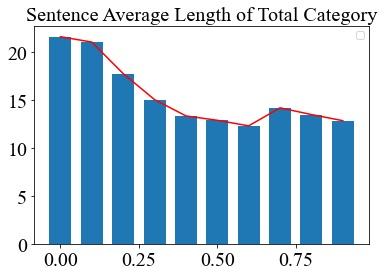

'\nanalysisor2.draw(\n    category_ids = category_ids,\n    save_folder = save_folder,\n    save = if_save,\n    bar_width = 0.07,\n    title_fontsize = title_fontsize,\n    labelsize = labelsize\n)\n'

In [5]:
category_ids = ['total']
save_folder = r'E:\_论文尝试\论文\论文\图\统计图'
if_save = True
title_fontsize = 20
labelsize = 20

analysisor1.draw(
    category_ids = category_ids,
    save_folder = save_folder,
    save = if_save,
    bar_width = 0.07,
    title_fontsize = title_fontsize,
    labelsize = labelsize
)
'''
analysisor2.draw(
    category_ids = category_ids,
    save_folder = save_folder,
    save = if_save,
    bar_width = 0.07,
    title_fontsize = title_fontsize,
    labelsize = labelsize
)
'''

In [6]:
#analysisor._compute_avg()

In [7]:
from utils import plot_report
import matplotlib.pyplot as plt
plt.rc('font', family = 'Times New Roman')

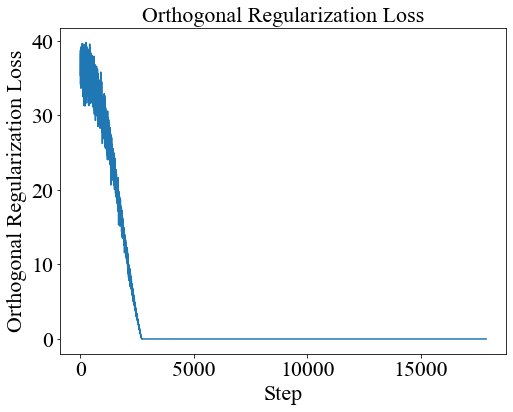

In [8]:
draw = ['asp_weight_norm', 'loss_without_reg', 'loss_reg', 'lr', 'loss']
draw = ['loss_reg']
plotter = plot_report()
plotter.draw_report(draw, report_folder='./normal/report',skip = 1, title_fontsize = 22, figure_size = (8, 6),
                    labelsize = 22, save_folder = r'E:\_论文尝试\论文\论文\图\统计图')